<a href="https://colab.research.google.com/github/ricardom98/equipo52_IA_AA/blob/main/Arboldedecision_Equipo52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [104]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.metrics import make_scorer

# Para Crear Arbol de Decisión como Imagen :
from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier

#**Ejercicio-1.** 

In [105]:
url = 'https://raw.githubusercontent.com/ricardom98/equipo52_IA_AA/main/SouthGermanCredit.asc'

df = pd.read_csv(url, sep='\s+')
df.describe()


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [106]:
df_copy = df.copy()
translated_cols = ["status", "duration", "credit_history", "purpose", "amount", "savings", 
                   "employment_duration", "installment_rate", "personal_status_sex", 
                   "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing",
                   "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]

df_copy.columns = translated_cols
df_copy

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.**

In [107]:
X = df_copy.iloc[:,0:20] 
y = df_copy['credit_risk'] #Usamos corchetes simples para recibir una lista (1d y no tener que usar np.ravel(y) en cross validation)
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


In [108]:
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size = 0.15, random_state = 7)
print('Dimensión del conjunto de entrenamiento variables independientes: ', Xtv.shape)
print('Dimensión del conjunto de prueba variables independientes: ', Xtest.shape, '\n')
print('Dimensión del conjunto de entrenamiento variable dependiente: ', ytv.shape)
print('Dimensión del conjunto de prueba variable dependiente: ', ytest.shape)

Dimensión del conjunto de entrenamiento variables independientes:  (850, 20)
Dimensión del conjunto de prueba variables independientes:  (150, 20) 

Dimensión del conjunto de entrenamiento variable dependiente:  (850,)
Dimensión del conjunto de prueba variable dependiente:  (150,)


#**Ejercicio-3.**

In [109]:
# Definimos las columnas que corresponden a cada tipo de dato

names_pipeline_cat = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing'] # se agregó telephone como categórico porque clasifica entre los que sí tienen y los que no tienen

names_pipeline_num = ['duration','amount','age']

names_pipeline_bin = ['people_liable','telephone','foreign_worker']

names_pipeline_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job'] # se consideran ordinales aquellas variables cuyos valores tienen una correlación con la variable a la que representan 
                                                                                                          # (A mayor valor de la variable ordinal, mayor impacto tiene esto en la representación de la variable a la que esta 
                                                                                                          # representando).

names_pipeline_cat_bin = names_pipeline_cat + names_pipeline_bin


In [110]:
# Definimos las Pipelines

pipeline_cat_bin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                  ('OneHotE', OneHotEncoder())])

pipeline_num = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])

# Aplicamos las transformaciones a las columnas correspondientes con ColumnTransformer

transformaciones = ColumnTransformer( transformers = [
                                                      ('numtrans', pipeline_num, names_pipeline_num ),
                                                      ('catbintrans', pipeline_cat_bin, names_pipeline_cat_bin)],
                                                      remainder='passthrough')

#**Ejercicio-4.**

In [118]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression( max_iter=3000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RF - Random Forest:  
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  

  return modelos, nombres

In [119]:
# accuracy, precision, recall, f1-score y Gmean

def nues_accuracy(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  accuracy = (vp + vn) / (vn + fp + fn + vp)
  return accuracy

def nues_precision(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  precision = vp / (vp + fp)
  return precision

def nues_recall(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  recall = vp / (vp + fn)
  return recall

def nues_f1score(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  f1score = (2*vp) / (2*vp + fp + fn)
  return f1score

def nues_gmean(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  recall,specifity = vp / (vp + fn), vn / (vn + fp)
  gmean =  np.sqrt(recall*specifity)
  return gmean
  


In [120]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('transformaciones',transformaciones),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

  nuestras_metricas = {'accuracy':make_scorer(nues_accuracy),
                       'precision':make_scorer(nues_precision),
                       'recall':make_scorer(nues_recall),
                       'f1score':make_scorer(nues_f1score),
                       'gmean':make_scorer(nues_gmean)}

  resultadoscv = cross_validate(pipeline, Xtv, np.ravel(ytv), scoring=nuestras_metricas, cv=cv, return_train_score=True)


  resultados.append(resultadoscv)

  print('Train Scores:\n')
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['train_accuracy']),
                                                                          np.std(resultadoscv['train_accuracy']), 
                                                                          np.mean(resultadoscv['train_precision']),
                                                                          np.std(resultadoscv['train_precision']), 
                                                                          np.mean(resultadoscv['train_recall']),
                                                                          np.std(resultadoscv['train_recall']),
                                                                          np.mean(resultadoscv['train_f1score']),
                                                                          np.std(resultadoscv['train_f1score']),
                                                                          np.mean(resultadoscv['train_gmean']),
                                                                          np.std(resultadoscv['train_gmean']),  
                                                                          ))

  print('\nTest Scores:\n')
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['test_accuracy']),
                                                                          np.std(resultadoscv['test_accuracy']), 
                                                                          np.mean(resultadoscv['test_precision']),
                                                                          np.std(resultadoscv['test_precision']), 
                                                                          np.mean(resultadoscv['test_recall']),
                                                                          np.std(resultadoscv['test_recall']),
                                                                          np.mean(resultadoscv['test_f1score']),
                                                                          np.std(resultadoscv['test_f1score']),
                                                                          np.mean(resultadoscv['test_gmean']),
                                                                          np.std(resultadoscv['test_gmean']),  
                                                                          ))


Train Scores:

LR:
mean Accuracy: 0.793 (0.0069)
mean Precision: 0.818 (0.0062)
mean Recall: 0.910 (0.0079)
mean f1score: 0.862 (0.0046)
Gmean: 0.679 (0.0136)


Test Scores:

LR:
mean Accuracy: 0.759 (0.0239)
mean Precision: 0.797 (0.0182)
mean Recall: 0.886 (0.0255)
mean f1score: 0.839 (0.0168)
Gmean: 0.629 (0.0391)

Train Scores:

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Test Scores:

DT:
mean Accuracy: 0.679 (0.0382)
mean Precision: 0.779 (0.0258)
mean Recall: 0.765 (0.0461)
mean f1score: 0.771 (0.0312)
Gmean: 0.598 (0.0472)

Train Scores:

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Test Scores:

RF:
mean Accuracy: 0.750 (0.0190)
mean Precision: 0.777 (0.0125)
mean Recall: 0.909 (0.0325)
mean f1score: 0.837 (0.0145)
Gmean: 0.570 (0.0420)



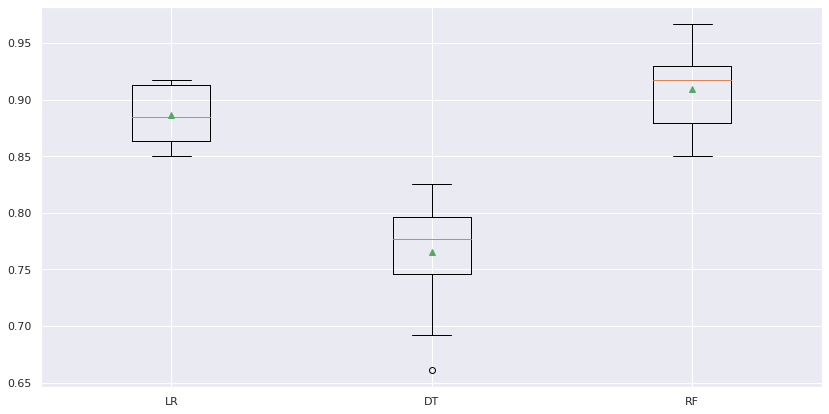

In [121]:
sns.set(rc={'figure.figsize':(14,7)})

bpRecall = list()

for i in range(len(resultados)):
  emod = resultados[i]['test_recall']
  bpRecall.append(emod)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-5.**

In [115]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**